# Population Growth using Logistic Growth Models _through Python_:

Logistic growth of fisheries or other poplations will go towards a Carrying Capacity. The Growth will start exponentially and is S-shaped.

### Importing necessary Libraries/Packages:-

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt

### For a specific rate of Growth and Carrying Capacity, the population is shown.

In [2]:
string = input("What is the Growth rate: ")
r = float(string)
string = input("What is the Carrying Capacity: ")
K = int(string)
string = input("What is the Time span: ")
t = int(string)
num = np.zeros(t+1)
num[0] = 1

What is the Growth rate: 0.5
What is the Carrying Capacity: 200
What is the Time span: 50


### Implementing the Differential equation through Iterations.

In [3]:
for i in range(t):
    num[i+1] = num[i]+ r*num[i]*(1-num[i]/K)

### The vertical line shows the maximum derivative, that is where the maximum Growth occurs:-

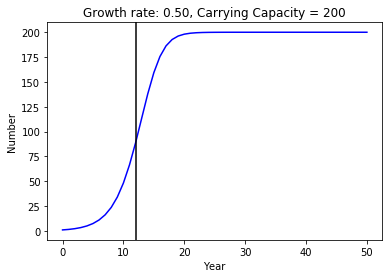

In [4]:
plt.plot(range(t+1),num, 'b')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Growth rate: %.2f, Carrying Capacity = %d'%(r,K))
plt.axvline(np.argmax(np.diff(num)), color = 'k')
plt.show()

## Presentation of the Lotka-Volterra Model:

We will have a look at the Lotka-Volterra model, also known as the predator-prey equations, which is a pair of first order, non-linear, differential equations frequently used to describe the dynamics of biological systems in which two species interact, one a predator and the other its prey. The model was proposed independently by Alfred J. Lotka in 1925 and Vito Volterra in 1926, and can be described by

du/dt = au - buv
dv/dt = -cv + dbu*v

with the following notations:

    u: number of preys (for example, rabbits)

    v: number of predators (for example, foxes)

    a, b, c, d are constant parameters defining the behavior of the population:

        a is the natural growing rate of rabbits, when there's no fox

        b is the natural dying rate of rabbits, due to predation

        c is the natural dying rate of fox, when there's no rabbit

        d is the factor describing how many caught rabbits let create a new fox

We will use X=[u, v] to describe the state of both populations.

#### Definition of the equations:


In [15]:
#!python
from numpy import *
import pylab as p
# Definition of parameters
inp = input("What is the Growth rate of Rabbits: ")
a = float(inp)
inp = input("What is the Death rate of Rabbits: ")
b = float(inp)
string = input("What is the Death rate of Fox: ")
c = float(inp)
string = input("Factor of Conversion: ")
d = float(inp)
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])


What is the Growth rate of Rabbits: 0.5
What is the Death rate of Rabbits: 0.4
What is the Death rate of Fox: 0.15
Factor of Conversion: 0.75


### Population equilibrium

Before using SciPy to integrate this system, we will have a closer look at position equilibrium. Equilibrium occurs when the growth rate is equal to 0. This gives two fixed points:


In [16]:
#!python
X_f0 = array([     0. ,  0.])
X_f1 = array([ c/(d*b), a/b])
all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True

True

### Stability of the fixed points

Near these two points, the system can be linearized: dX_dt = A_f*X where A is the Jacobian matrix evaluated at the corresponding point. We have to define the Jacobian matrix:


In [17]:
#!python
def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])

So near X_f0, which represents the extinction of both species, we have:

In [18]:


#! python
A_f0 = d2X_dt2(X_f0)                    # >>> array([[ 1. , -0. ],
                                        #            [ 0. , -1.5]])



Near X_f0, the number of rabbits increase and the population of foxes decrease. The origin is therefore a saddle point.

Near X_f1, we have:


In [19]:
#!python
A_f1 = d2X_dt2(X_f1)                    # >>> array([[ 0.  , -2.  ],
                                        #            [ 0.75,  0.  ]])
# whose eigenvalues are +/- sqrt(c*a).j:
lambda1, lambda2 = linalg.eigvals(A_f1) # >>> (1.22474j, -1.22474j)
# They are imaginary numbers. The fox and rabbit populations are periodic as follows from further
# analysis. Their period is given by:
T_f1 = 2*pi/abs(lambda1)                # >>> 5.130199


### Integrating the ODE using scipy.integrate

Now we will use the scipy.integrate module to integrate the ODEs. This module offers a method named odeint, which is very easy to use to integrate ODEs:


In [20]:
#!python
from scipy import integrate
t = linspace(0, 15,  1000)              # time
X0 = array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'

'Integration successful.'

`infodict` is optional, and you can omit the `full_output` argument if you don't want it. Type "info(odeint)" if you want more information about odeint inputs and outputs.

We can now use Matplotlib to plot the evolution of both populations:


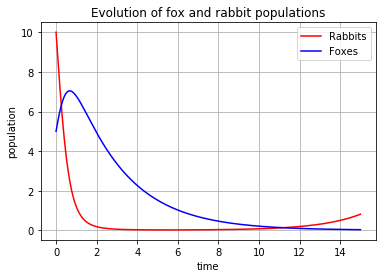

In [21]:
#!python
rabbits, foxes = X.T
f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Rabbits')
p.plot(t, foxes  , 'b-', label='Foxes')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations')
f1.savefig('rabbits_and_foxes_1.png')

The populations are indeed periodic, and their period is close to the value T_f1 that we computed.

### Plotting direction fields and trajectories in the phase plane

We will plot some trajectories in a phase plane for different starting points between X_f0 and X_f1.

We will use Matplotlib's colormap to define colors for the trajectories. These colormaps are very useful to make nice plots. Have a look at ShowColormaps if you want more information.

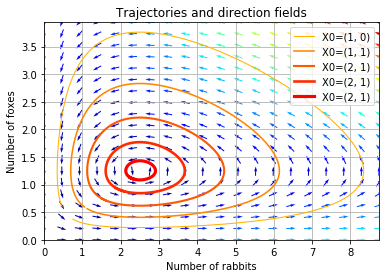

In [22]:
values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
f2.savefig('rabbits_and_foxes_2.png')

This graph shows us that changing either the fox or the rabbit population can have an unintuitive effect. If, in order to decrease the number of rabbits, we introduce foxes, this can lead to an increase of rabbits in the long run, depending on the time of intervention.